In [38]:
from tensorflow.keras.utils import img_to_array ,array_to_img

In [39]:
from tensorflow.keras.utils  import img_to_array ,array_to_img, load_img
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\dataset\Army person\bgb2.JPG")  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir=r'C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\dataset\Army person', save_prefix='army', save_format='jpeg'):
    i += 1
    if i > 30:
        break  # otherwise the generator would loop indef

In [40]:
import cv2,os

data_path=r'C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)
print(labels)


{'Army person': 0, 'Local person': 1}
['Army person', 'Local person']
[0, 1]


In [41]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [42]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [43]:
new_target.shape

(838, 2)

In [44]:
np.save('images.npy',data)
np.save('lables.npy',new_target)

In [45]:
import numpy as np
data=np.load(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\images.npy")
new_target=np.load(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\lables.npy")


In [46]:
data.shape

(838, 100, 100, 1)

In [47]:
data.shape[1:]

(100, 100, 1)

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 200)       2000      
                                                                 
 activation_2 (Activation)   (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 200)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_3 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                  

In [50]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [51]:
train_data.shape

(754, 100, 100, 1)

In [52]:
train_target.shape

(754, 2)

In [53]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.25)

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.5197 - accuracy: 0.8000

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


18/18 [==============================] - 41s 2s/step - loss: 0.5197 - accuracy: 0.8000 - val_loss: 0.4596 - val_accuracy: 0.7884
Epoch 2/20
18/18 [==============================] - ETA: 0s - loss: 0.3394 - accuracy: 0.8230

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.3394 - accuracy: 0.8230 - val_loss: 0.3896 - val_accuracy: 0.7884
Epoch 3/20
18/18 [==============================] - ETA: 0s - loss: 0.2584 - accuracy: 0.8442

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.2584 - accuracy: 0.8442 - val_loss: 0.3036 - val_accuracy: 0.8360
Epoch 4/20
18/18 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.9044

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


18/18 [==============================] - 38s 2s/step - loss: 0.2168 - accuracy: 0.9044 - val_loss: 0.2757 - val_accuracy: 0.8995
Epoch 5/20
18/18 [==============================] - ETA: 0s - loss: 0.2006 - accuracy: 0.9204

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


18/18 [==============================] - 38s 2s/step - loss: 0.2006 - accuracy: 0.9204 - val_loss: 0.2542 - val_accuracy: 0.8942
Epoch 6/20
18/18 [==============================] - ETA: 0s - loss: 0.1822 - accuracy: 0.9239

INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.1822 - accuracy: 0.9239 - val_loss: 0.2490 - val_accuracy: 0.8995
Epoch 7/20
18/18 [==============================] - ETA: 0s - loss: 0.1525 - accuracy: 0.9522

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.1525 - accuracy: 0.9522 - val_loss: 0.2302 - val_accuracy: 0.8995
Epoch 8/20
18/18 [==============================] - 37s 2s/step - loss: 0.1386 - accuracy: 0.9699 - val_loss: 0.2985 - val_accuracy: 0.8519
Epoch 9/20
18/18 [==============================] - 37s 2s/step - loss: 0.1506 - accuracy: 0.9593 - val_loss: 0.2355 - val_accuracy: 0.8889
Epoch 10/20
18/18 [==============================] - 37s 2s/step - loss: 0.1321 - accuracy: 0.9735 - val_loss: 0.2360 - val_accuracy: 0.8889
Epoch 11/20
18/18 [==============================] - ETA: 0s - loss: 0.1207 - accuracy: 0.9841

INFO:tensorflow:Assets written to: model-011.model\assets


INFO:tensorflow:Assets written to: model-011.model\assets


18/18 [==============================] - 41s 2s/step - loss: 0.1207 - accuracy: 0.9841 - val_loss: 0.2150 - val_accuracy: 0.9101
Epoch 12/20
18/18 [==============================] - ETA: 0s - loss: 0.1129 - accuracy: 0.9929

INFO:tensorflow:Assets written to: model-012.model\assets


INFO:tensorflow:Assets written to: model-012.model\assets


18/18 [==============================] - 38s 2s/step - loss: 0.1129 - accuracy: 0.9929 - val_loss: 0.2143 - val_accuracy: 0.9259
Epoch 13/20
18/18 [==============================] - 36s 2s/step - loss: 0.1181 - accuracy: 0.9858 - val_loss: 0.2791 - val_accuracy: 0.9048
Epoch 14/20
18/18 [==============================] - ETA: 0s - loss: 0.1087 - accuracy: 0.9965

INFO:tensorflow:Assets written to: model-014.model\assets


INFO:tensorflow:Assets written to: model-014.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.1087 - accuracy: 0.9965 - val_loss: 0.2133 - val_accuracy: 0.9418
Epoch 15/20
18/18 [==============================] - ETA: 0s - loss: 0.1023 - accuracy: 0.9965

INFO:tensorflow:Assets written to: model-015.model\assets


INFO:tensorflow:Assets written to: model-015.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.1023 - accuracy: 0.9965 - val_loss: 0.1957 - val_accuracy: 0.9418
Epoch 16/20
18/18 [==============================] - ETA: 0s - loss: 0.0988 - accuracy: 0.9965

INFO:tensorflow:Assets written to: model-016.model\assets


INFO:tensorflow:Assets written to: model-016.model\assets


18/18 [==============================] - 39s 2s/step - loss: 0.0988 - accuracy: 0.9965 - val_loss: 0.1792 - val_accuracy: 0.9524
Epoch 17/20
18/18 [==============================] - 36s 2s/step - loss: 0.0957 - accuracy: 0.9982 - val_loss: 0.1869 - val_accuracy: 0.9524
Epoch 18/20
18/18 [==============================] - 37s 2s/step - loss: 0.0944 - accuracy: 0.9982 - val_loss: 0.1849 - val_accuracy: 0.9524
Epoch 19/20
18/18 [==============================] - ETA: 0s - loss: 0.0913 - accuracy: 0.9947

INFO:tensorflow:Assets written to: model-019.model\assets


INFO:tensorflow:Assets written to: model-019.model\assets


18/18 [==============================] - 38s 2s/step - loss: 0.0913 - accuracy: 0.9947 - val_loss: 0.1729 - val_accuracy: 0.9524
Epoch 20/20
18/18 [==============================] - 37s 2s/step - loss: 0.0880 - accuracy: 0.9982 - val_loss: 0.1759 - val_accuracy: 0.9524


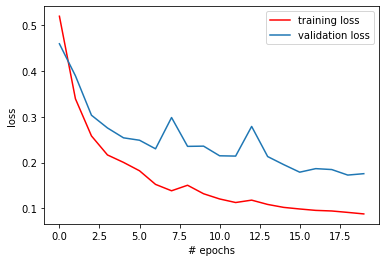

In [54]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

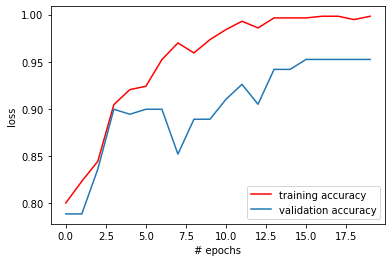

In [55]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [1]:
from keras.models import load_model
import cv2
import numpy as np
import face_recognition
import os


from pygame import mixer
mixer.init()
sound = mixer.Sound(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\beep-02.wav")
sound1 = mixer.Sound(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\mixkit-office-telephone-ring-1350.wav")



model = load_model(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\model-016.model")

face_clsfr=cv2.CascadeClassifier(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\haarcascade_upperbody.xml")

cap=cv2.VideoCapture(0)



# Load a sample picture and learn how to recognize it.
shojeb_image = face_recognition.load_image_file(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\shojeb\shojeb.jpg")
shojeb_face_encoding = face_recognition.face_encodings(shojeb_image)[0]

# Load a second sample picture and learn how to recognize it.
shapnik_image = face_recognition.load_image_file(r"C:\Users\Dell\Desktop\Shojeb ML Projects\CNN5\shapnik\shapnik.jpg")
shapnik_face_encoding = face_recognition.face_encodings(shapnik_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    shojeb_face_encoding,
    shapnik_face_encoding
]
known_face_names = [
    "Army name:Shojeb",
    "Army name:Shapnik"
]

# Initialize some variables
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True


labels_dict={0:'Army',1:'Local'}
color_dict={0:(0,255,0),1:(0,0,255)}
currentframe=0

if not os.path.exists('data'):
        os.makedirs('data')  

while(True):
    
    ret,frame=cap.read()
     # Resize frame of video to 1/4 size for faster face recognition processing
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
            # Convert the image from BGR color (which OpenCV uses) to RGB color (which face_recognition uses)
    rgb_small_frame = small_frame[:, :, ::-1]

          
           
    # Find all the faces and face encodings in the current frame of video

    # Only process every other frame of video to save time
    if process_this_frame:
        # Find all the faces and face encodings in the current frame of video
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # See if the face is a match for the known face(s)
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # # If a match was found in known_face_encodings, just use the first one.
            # if True in matches:
            #     first_match_index = matches.index(True)
            #     name = known_face_names[first_match_index]

            # Or instead, use the known face with the smallest distance to the new face
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame


    
    
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  
    i=1
    for (x,y,w,h) in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
        
        cv2.rectangle(frame,(x,y),(x+w,y+h),color_dict[label],4)
        cv2.rectangle(frame,(x,y-40),(x+w,y),color_dict[label],4)
        cv2.putText(frame, labels_dict[label]+str(i), (x, y-10),cv2.FONT_ITALIC, 1,(255,255,255),4)
        
        if(labels_dict[label] =='Army'):
            print("No Beep")
            # Display the results
            cv2.putText(frame, name, (x, y+15),cv2.FONT_ITALIC, 1,(255,255,255),4)
            i += 1
            if (i<=2):
                sound1.play()
                print('alert! alert! No army here')

            
        elif(labels_dict[label] =='Local'):
                sound.play()
                print("Beep") 
                cv2.imwrite('./data/frame'+str(currentframe)+'.jpg',frame)
                currentframe+=1
    cv2.imshow('LIVE',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()




pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html
